# Decision Tree 

## 1. Titanic Survial Classification Problem
- 본 실습에서는 타이타닉 생존 데이터를 이용하여
    - 데이터를 이해하고 전처리한 후
    - 의사결정나무 모델을 이용하여 생존한 탑승객들을 분류해보고자 합니다.
 

## Background
- Source : https://www.kaggle.com/c/titanic/data
- On April 15, 1912, Titanic sank after colliding with an iceberg
- Resulting in the death of 1502 out of 2224 passengers and crew
- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others

## Goal
- Classify passengers who survived using features in the dataset

### (1) Load the data

In [1]:
# pandas 등 필요한 패키지를 불러온다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
data = pd.read_csv('./train.csv')

In [3]:
# 데이터의 크기와 모양을 확인한다.
print(data.shape)

(891, 12)


In [4]:
# 첫 10개의 데이터를 확인한다.
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# 어떠한 변수가 데이터를 구성하고 있는지 살펴본다.
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- info() 함수를 이용하여 feature 별로 값이 존재하지 않는 데이터 유무를 파악하고 구성하는 변수의 자료형을 확인할 수 있습니다.
- describe() 함수를 이용하여 데이터를 요약하고 통계 정보를 확인할 수 있습니다. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### (2) Understand the data
- 다음은 데이터에 대한 이해를 바탕으로 기계학습 모델의 학습을 위해 필요하지 않은 변수와 타겟값 등을 파악해봅시다.
    - "PassengerID"와 "Name" 은 모델의 학습에 필요하지 않은 feature입니다.
    - "Ticket" 은 사용할 수도, 사용하지 않을 수도 있는 feature입니다.
    - "Survived"는 분류하고자 하는 타겟 변수입니다.
    - "Sex", "Age", "SibSp", "Parch", "Pclass" 등은 input으로 사용할 feature입니다.

- 모델의 학습을 위해서는 모든 feature가 실수의 형태로 제공되어야 합니다. 따라서 "sex" feature에서 male/female 변수를 실수 형태로 변경해주는 등 데이터를 전처리해보도록 하겠습니다.

### (3) Data Preprocessing
- 데이터 전처리 단계에서는 
    - 모델이 학습할 수 있는 형태로의 데이터 변환과 
    - 결측치를 처리해보도록 하겠습니다.

- 먼저 데이터를 변환해보도록 하겠습니다.
- 범주형(categorical) 변수인 "Sex" feature 를 수치형(numeric) 변수로 입력할 수 있도록 "male" 을 0으로, "female"을 1로 변환해보도록 하겠습니다. 

In [8]:
# male에 0, female에 1을 매핑(map)한다.
binary_vals = {"Sex": {"male": 0, "female": 1}}

In [9]:
# 위에서 정의한 방식으로 "Sex" 열의 데이터를 수치형으로 치환한다.
data.replace(binary_vals, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


- "Pclass" 변수의 경우, ordinal 변수로 취급할 지, nominal 변수로 취급할 지에 따라 인풋(input) feature로 사용할 수도, 사용하지 않을 수도 있습니다. 
- "Pclass" 변수를 구성하고 있는 데이터의 형태를 확인해봅시다.

In [10]:
# "Pclass" 변수에 값의 종류가 몇 가지 있는지 확인한다.
print(data.Pclass.unique()) # order가 있는 경우 그냥 사용하기도 한다

[3 1 2]


- 범주형 변수를 수치형으로 변환하기만 하면 데이터간 관계성이 부여됩니다. 이는 모델 학습에 영향을 줄 수 수 있으므로 서로 독립적인 가변수로 변환하여 이러한 문제를 방지할 수 있습니다.

In [11]:
# 범주형 데이터를 pandas의 get_dummies 함수를 이용하여 가변수로 가공해봅시다.
pd.get_dummies(data, columns=["Pclass"]).head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,True,False,False
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,False,False,True


- 이를 통해 Pclass 변수를 input 변수로 활용할 수 있음을 확인했습니다.
- scikit-learn 의 train_test_split 함수를 이용하여 일정한 비율로 Train, Test 데이터를 나눠봅시다.

In [12]:
# 데이터셋의 레코드 값과 타겟 값을 불러와 각각 X, y 라는 이름으로 저장한다.
X = data[["Sex", "Age", "SibSp", "Parch", "Pclass"]]
y = data["Survived"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

- 다음으로, 결측치를 처리해보도록 하겠습니다. 
- 결측치를 포함한 데이터를 제거하는 방식과 결측치를 대체하는 방식 중에서 결측치를 대체(imputation)하는 방식을 사용해보도록 하겠습니다.

In [14]:
# data = data[data['Age'].notnull()] # 결측치 포함된 데이터 제거

- sklearn 패키지의 SimpleImputer 함수를 이용하여 결측치를 대체해봅시다. 
- strategy 옵션을 mean으로 설정하여 결측치가 아닌 값들의 평균으로 결측치를 대체합니다.
- train, test 데이터셋 각각에 적용해봅시다.

In [15]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = X_train.copy(); X_test = X_test.copy()
X_train.loc[:,'Age'] = imp.fit_transform(X_train.loc[:,['Age']])
X_test.loc[:,'Age'] = imp.transform(X_test.loc[:,['Age']])

### (4) Train Classification Models
-  위를 통해 데이터 준비가 끝났으니, 의사결정나무 모델을 가져와 훈련하도록 합니다.
- 우선, scikit-learn에서 DecisionTreeClassifier 이란 이름의 분류의사결정나무 모델을 가져와 clf 라는 이름으로 정의하겠습니다.
- 훈련용 데이터를 이용하여 의사결정나무를 훈련(fit)합니다.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

- 위를 통해 훈련이 완료되었습니다!
- 이제, predict 함수를 이용하여 훈련용 데이터셋과 테스트 셋 각각에 대해서 예측한 후 실제 값 y와 비교하여 모델의 성능을 평가해봅시다.
- 해당 예시에서 의사결정나무 모델은 분류 모델로 활용되었으므로, 분류를 위한 대표적인 평가 지표인 정확도(accuracy)를 구해보도록 하겠습니다.

In [17]:
from sklearn.metrics import accuracy_score
# 훈련, 테스트 데이터셋에 대한 모델의 예측값을 각각 y_train_hat과 y_test_hat 라는 이름으로 저장한다.
y_train_hat= clf.predict(X_train)
y_test_hat = clf.predict(X_test)
#모델의 성능을 평가한다.
print(accuracy_score(y_train, y_train_hat))
print(accuracy_score(y_test, y_test_hat))

0.9245585874799358
0.746268656716418


- 훈련된 의사결정나무 모델은 훈련용 데이터셋 분류 정확도 92%, 테스트 셋 분류 정확도 74% 의 성능을 보이는 것을 확인할 수 있습니다.

- 다음으로는 의사결정나무 모델을 시각화해보도록 하겠습니다. 
- 의사결정나무 모델을 시각화하는 방식은 크게
    - export_text 함수를 이용하여 텍스트 형태로 시각화하는 방법과
    - plot_tree 함수 또는 export_graphviz 함수를 이용하여 시각화하는 방법이 있습니다.
- 먼저 tree 의 export_text 함수를 이용하여 모델을 시각화해봅시다.

In [18]:
r = tree.export_text(clf,feature_names=list(X_train.columns))

In [19]:
print(r)

|--- Sex <= 0.50
|   |--- Age <= 6.50
|   |   |--- SibSp <= 3.00
|   |   |   |--- class: 1
|   |   |--- SibSp >  3.00
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- Age <= 2.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  2.00
|   |   |   |   |   |--- Age <= 3.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  3.50
|   |   |   |   |   |   |--- class: 0
|   |--- Age >  6.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Age <= 27.50
|   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |--- Age <= 17.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  17.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  23.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  27.50
|   |   |   |   |--- Age <= 30.50
|   |   |   |   |   |--- Age <= 29.13
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  29.13
|   |   |   |   |   |   |--- 

- 모델이 어떤 기준을 중심으로 분류하였는지 규칙을 확인할 수 있습니다. 
- 다음으로는 tree 의 plot_tree 함수를 이용하여 모델을 시각화해봅시다.

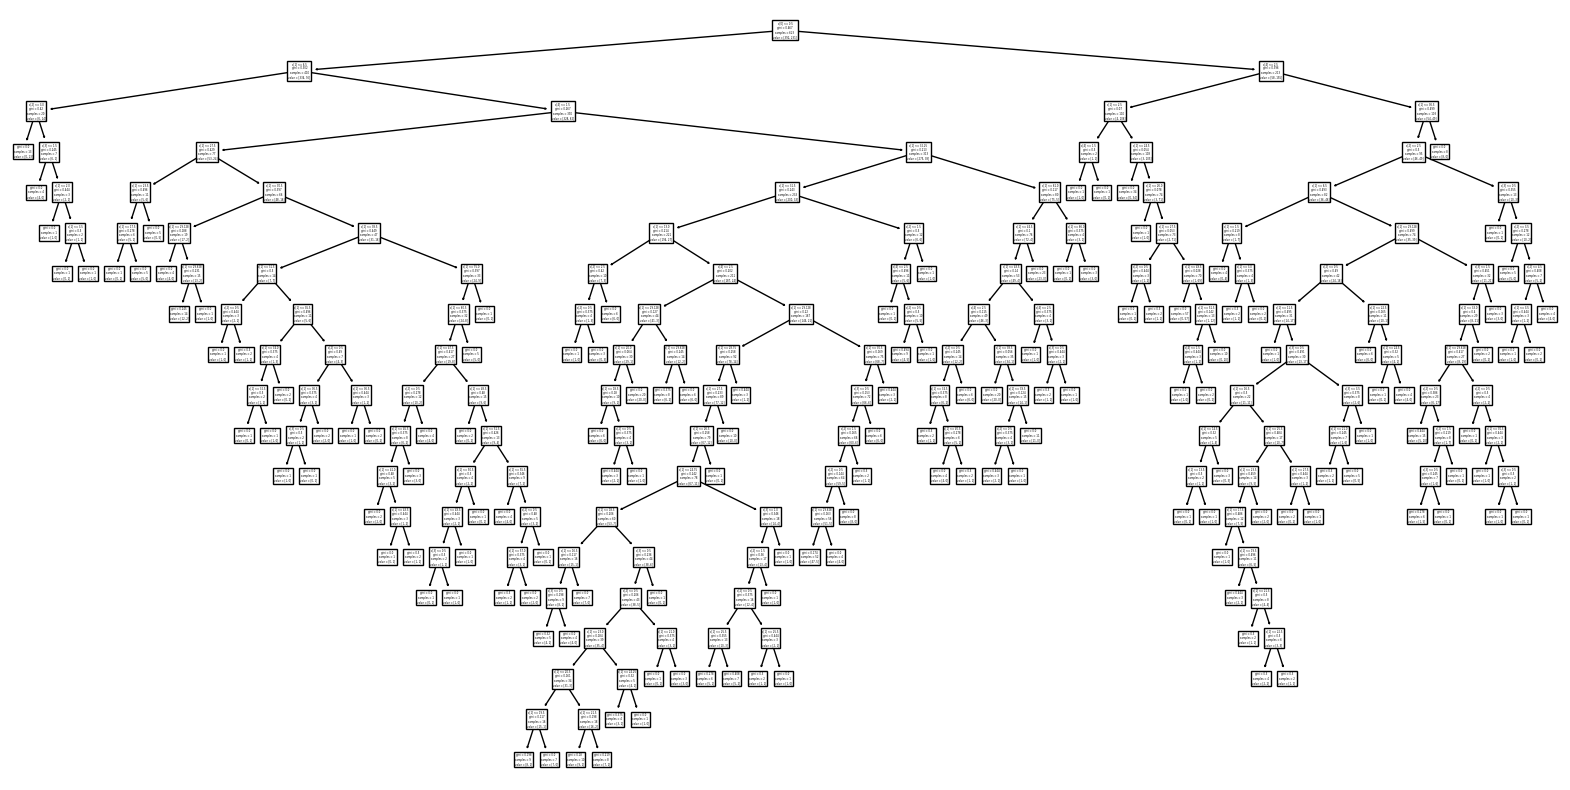

In [20]:
plt.figure(figsize=(20,10))
plt.show(tree.plot_tree(clf))

- 타겟의 값에 따라 색을 다르게 부여하여 보다 직관적으로 시각화할 수 있습니다.

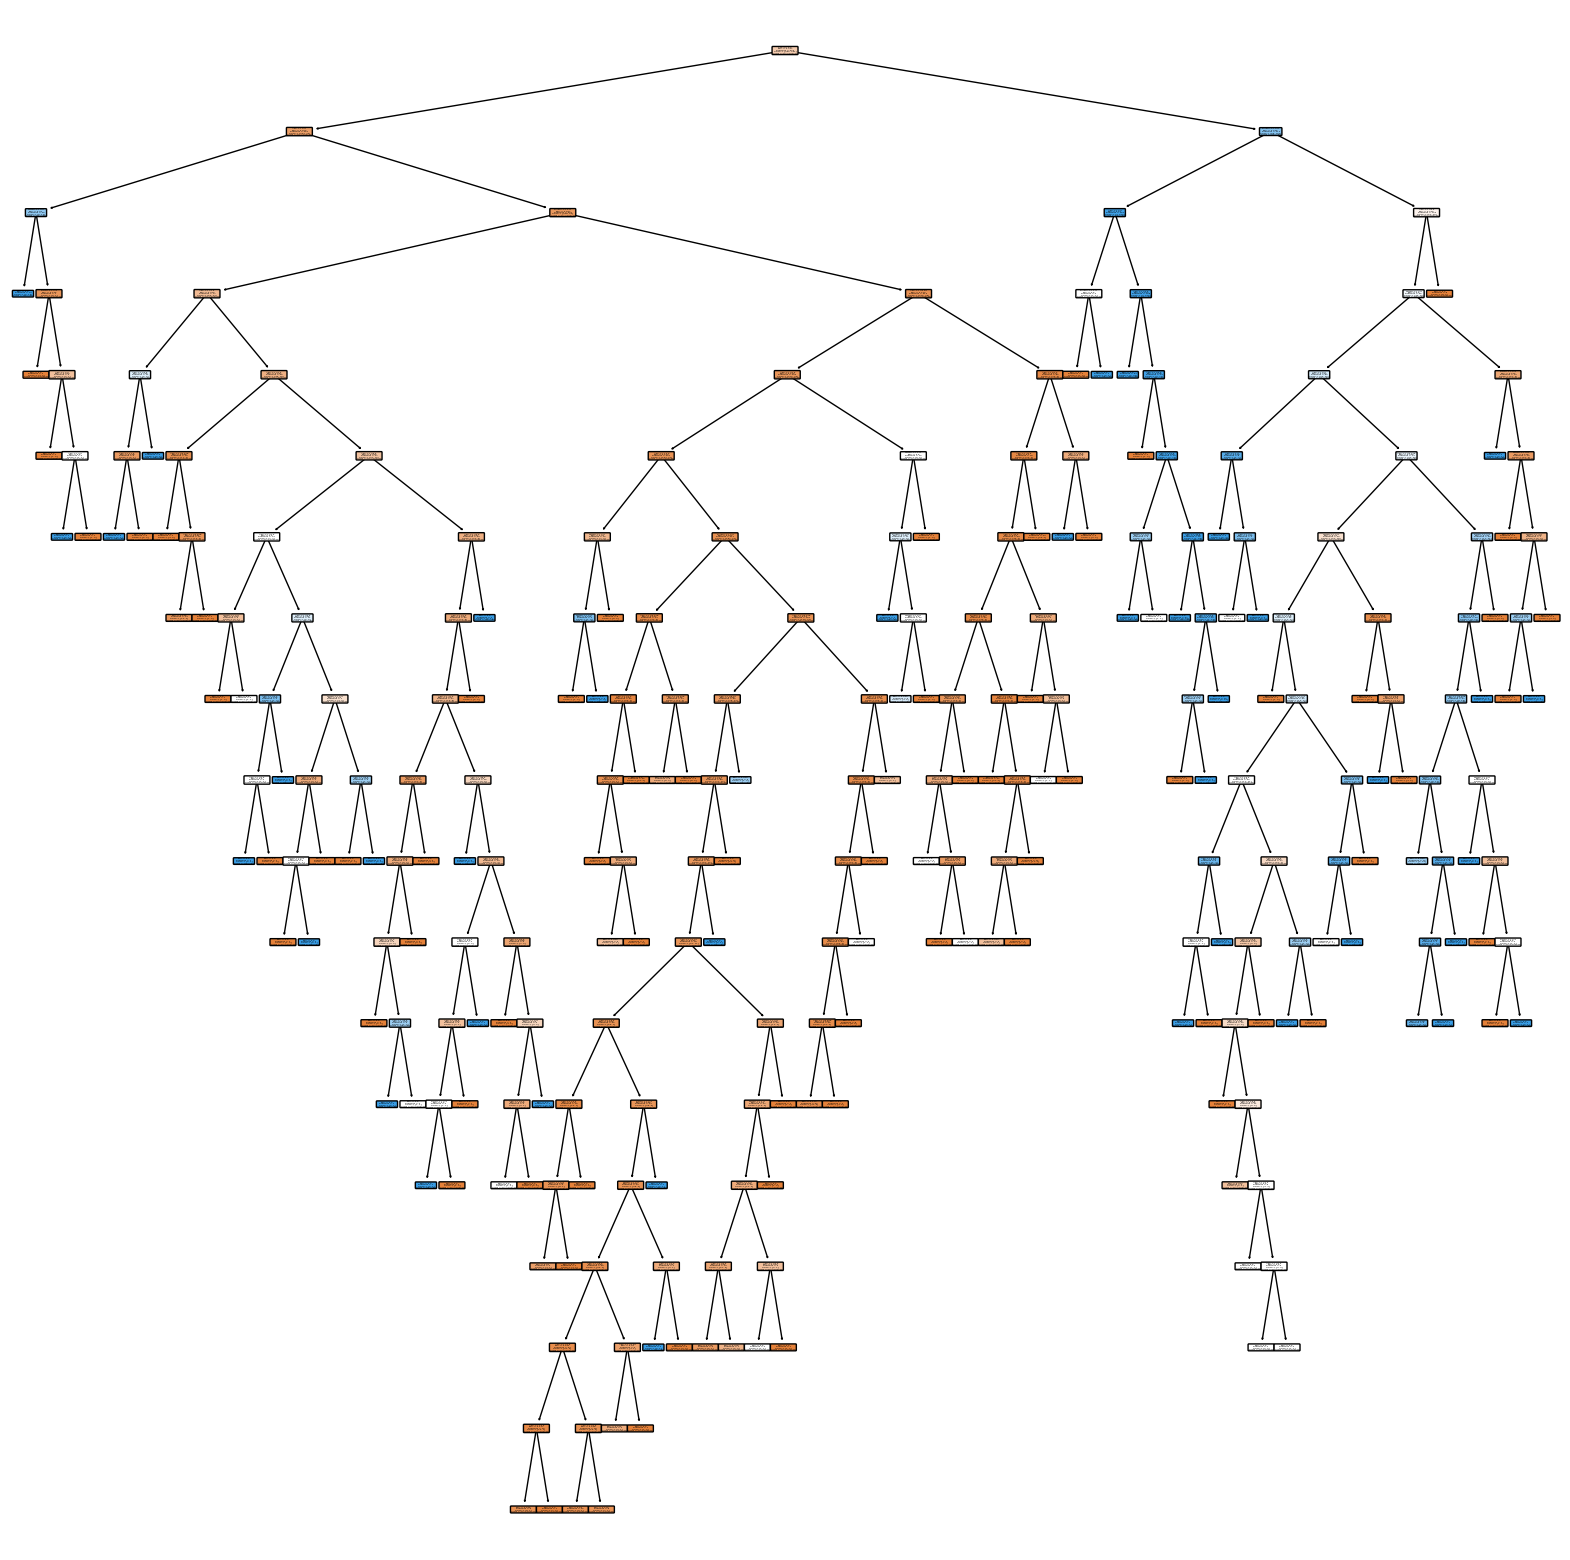

In [21]:
plt.figure(figsize=(20,20))
plt.show(tree.plot_tree(clf, 
                        feature_names = X_train.columns, 
                        class_names=['not-survived','survived'],
                        filled = True,rounded=True))

### (5) Hyperparameter Tuning
- 의사결정나무 모형의 최대 깊이(max_depth)에 따라 모델의 성능이 어떻게 달라질 수 있는지 확인해보도록 하겠습니다.

Text(0.5, 0, 'Tree Max depth')

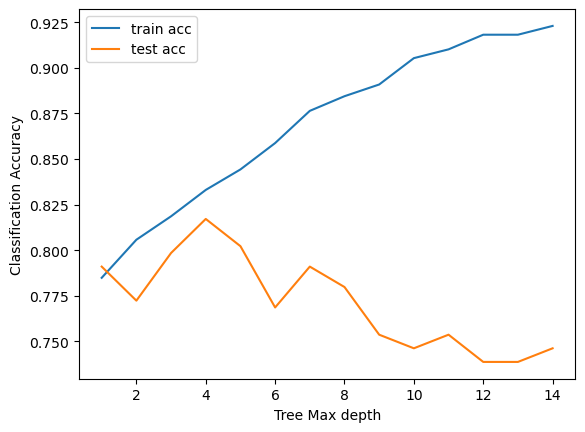

In [22]:
train_acc, test_acc = [], []
# 깊이가 1~14일 때 
depth_list = list(range(1,15))
for depth in depth_list : 
    model = DecisionTreeClassifier(max_depth=depth)
    model = model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

    #print(accuracy_score(y_train, model.predict(X_train)))
    #print(accuracy_score(y_test, model.predict(X_test)))
    
plt.plot(depth_list, train_acc)
plt.plot(depth_list, test_acc)
plt.legend(['train acc','test acc'])
plt.ylabel('Classification Accuracy')
plt.xlabel('Tree Max depth')

- 깊이가 깊어질수록 더 자세해지기 때문에 학습 데이터셋에 대한 정확도(train accuracy)는 증가하는 것을 확인할 수 있습니다.
- 반면, test accuracy는 점점 감소하므로 overfitting이 발생한다는 것을 확인할 수 있습니다. 
- Max Depth가 4 일 때 Test accuracy 가 가장 높았으므로 이 때의 모델을 시각화해봅시다.

In [23]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

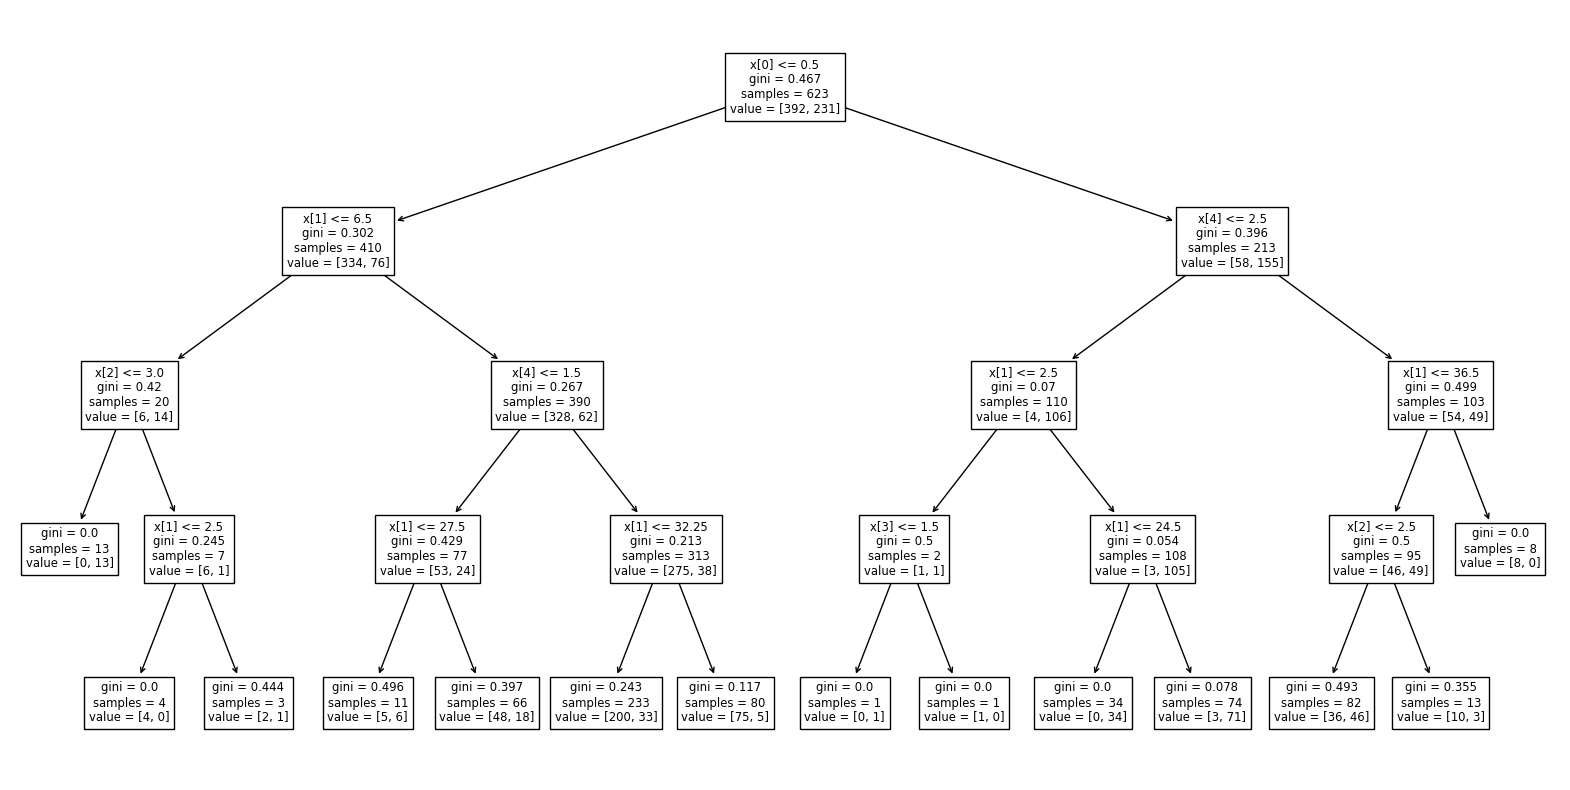

In [24]:
plt.figure(figsize=(20,10))
plt.show(tree.plot_tree(clf))

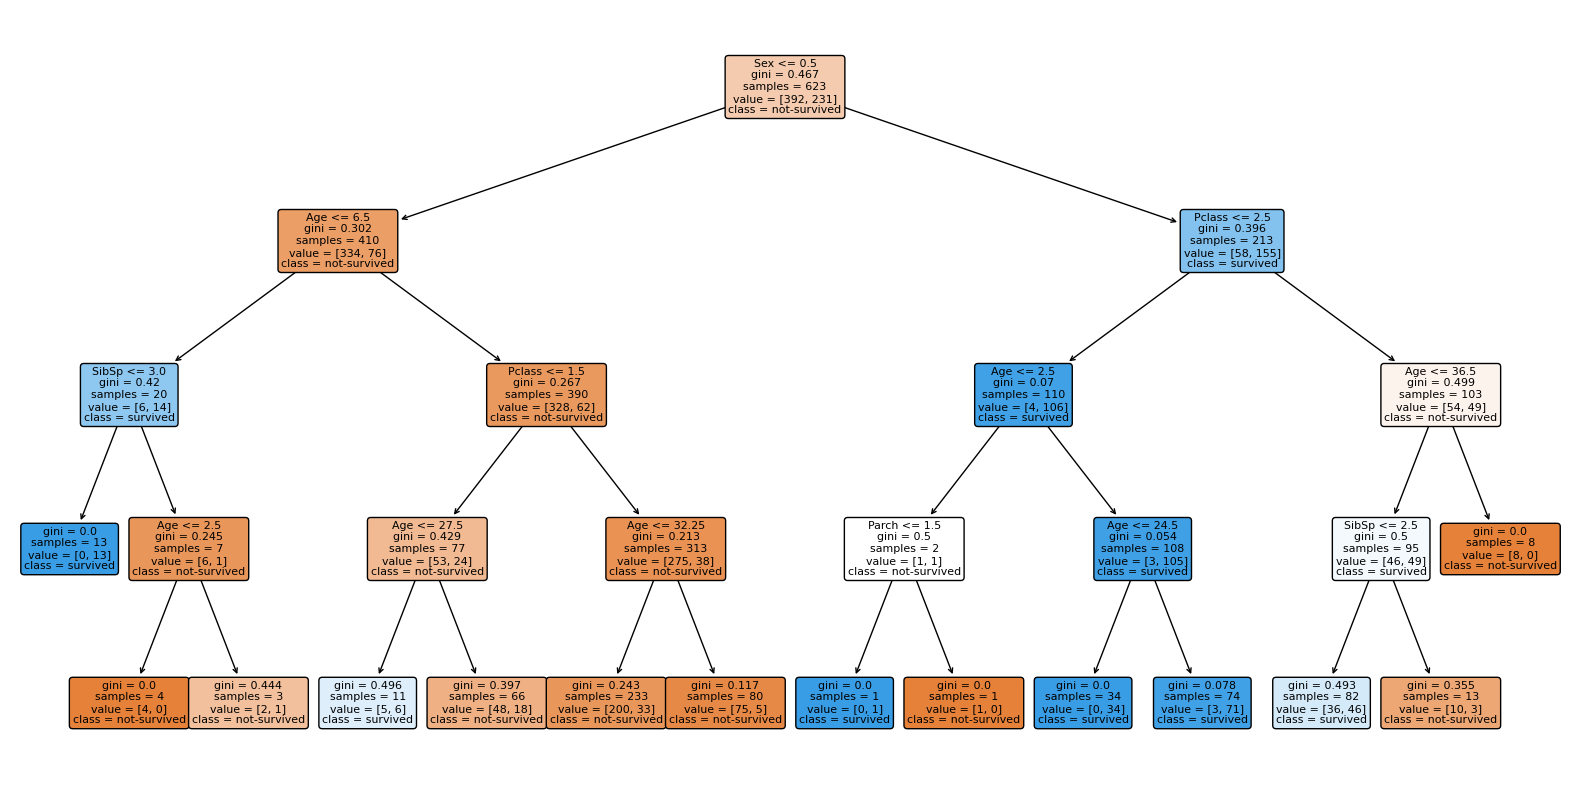

In [25]:
plt.figure(figsize=(20,10))
plt.show(tree.plot_tree(clf, 
                        feature_names = X_train.columns, 
                        class_names=['not-survived','survived'],
                        filled = True,rounded=True))